In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats 

In [3]:
#import dataset and separate columns at ;
df = pd.read_csv('telecom_users.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#size of dataset

df.shape

(7043, 21)

In [6]:
#check for null values
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


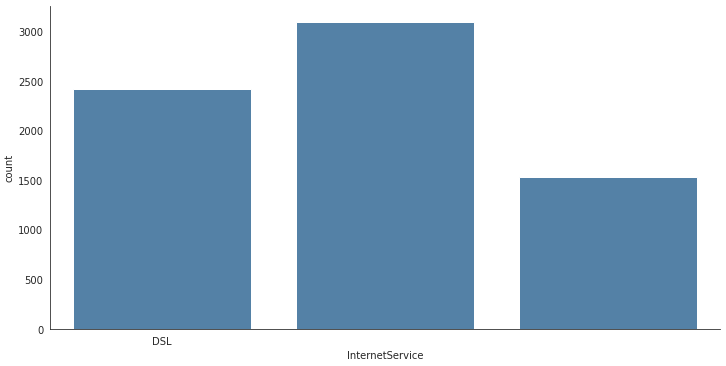

In [8]:
with sns.axes_style('white'):
    g = sns.catplot("InternetService", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=3)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


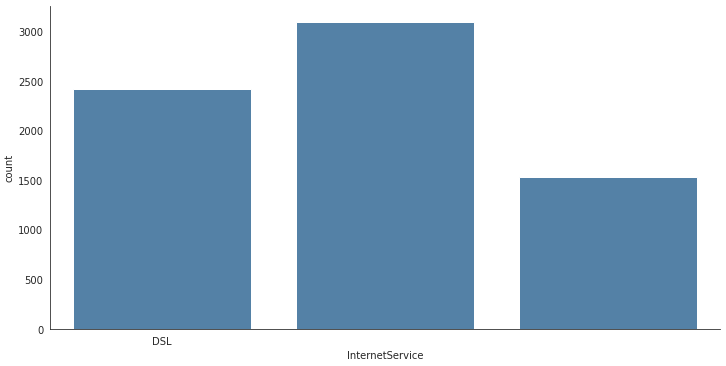

In [9]:
with sns.axes_style('white'):
    g = sns.catplot("InternetService", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=3)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

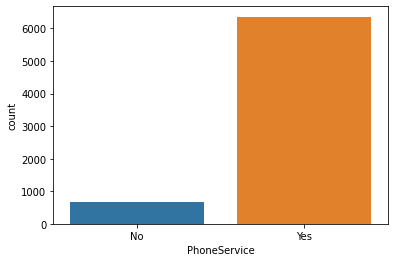

In [10]:
sns.countplot(df['PhoneService'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

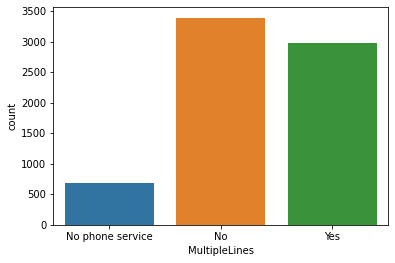

In [11]:
sns.countplot(df['MultipleLines'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

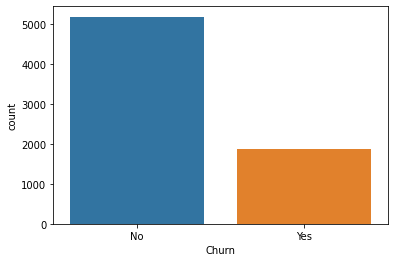

In [12]:
sns.countplot(df['Churn'])

In [13]:
#take data of customers who retained only
df = df.loc[df['Churn'].isin(['No'])]

In [14]:
df.shape

(5174, 21)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

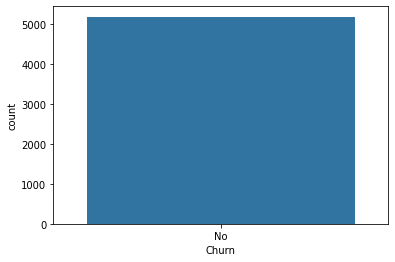

In [15]:
sns.countplot(df['Churn'])

In [16]:
df.shape

(5174, 21)

In [17]:
#change dataset to do market basket analysis
# get only required columns
#drop other columns

df.drop([ 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis='columns', inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df.shape

(5174, 9)

In [19]:
print(df.columns.values)

['PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies']


In [20]:
#unique values in row
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0})

<ipython-input-21-55373f95928f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0})


In [22]:
#unique values in row
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [23]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No phone service':0, 'No':0})

<ipython-input-23-bd167d8a3fef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No phone service':0, 'No':0})


In [24]:
#unique values in row
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [25]:
df['InternetService'] = df['InternetService'].map({'DSL':1, 'Fiber optic':1, 'No':0})

<ipython-input-25-f1323c7d5962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InternetService'] = df['InternetService'].map({'DSL':1, 'Fiber optic':1, 'No':0})


In [26]:
#unique values in row
df.OnlineSecurity.unique()


array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1, 'No internet service':0, 'No':0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1, 'No internet service':0, 'No':0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes':1, 'No internet service':0, 'No':0})
df['TechSupport'] = df['TechSupport'].map({'Yes':1, 'No internet service':0, 'No':0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1, 'No internet service':0, 'No':0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1, 'No internet service':0, 'No':0})

<ipython-input-27-e6ec4ed1d204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1, 'No internet service':0, 'No':0})
<ipython-input-27-e6ec4ed1d204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1, 'No internet service':0, 'No':0})
<ipython-input-27-e6ec4ed1d204>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [28]:
df

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,1,0,1,0,0,0,0
1,1,0,1,1,0,1,0,0,0
3,0,0,1,1,0,1,1,0,0
6,1,1,1,0,1,0,0,1,0
7,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,0,0,0,0,0
7038,1,1,1,1,0,1,1,1,1
7039,1,1,1,0,1,1,0,1,1
7040,0,0,1,1,0,0,0,0,0


[Text(0, 0, 'PhoneService'),
 Text(1, 0, 'InternetService'),
 Text(2, 0, 'MultipleLines'),
 Text(3, 0, 'StreamingMovies'),
 Text(4, 0, 'OnlineBackup'),
 Text(5, 0, 'StreamingTV'),
 Text(6, 0, 'DeviceProtection'),
 Text(7, 0, 'TechSupport'),
 Text(8, 0, 'OnlineSecurity')]

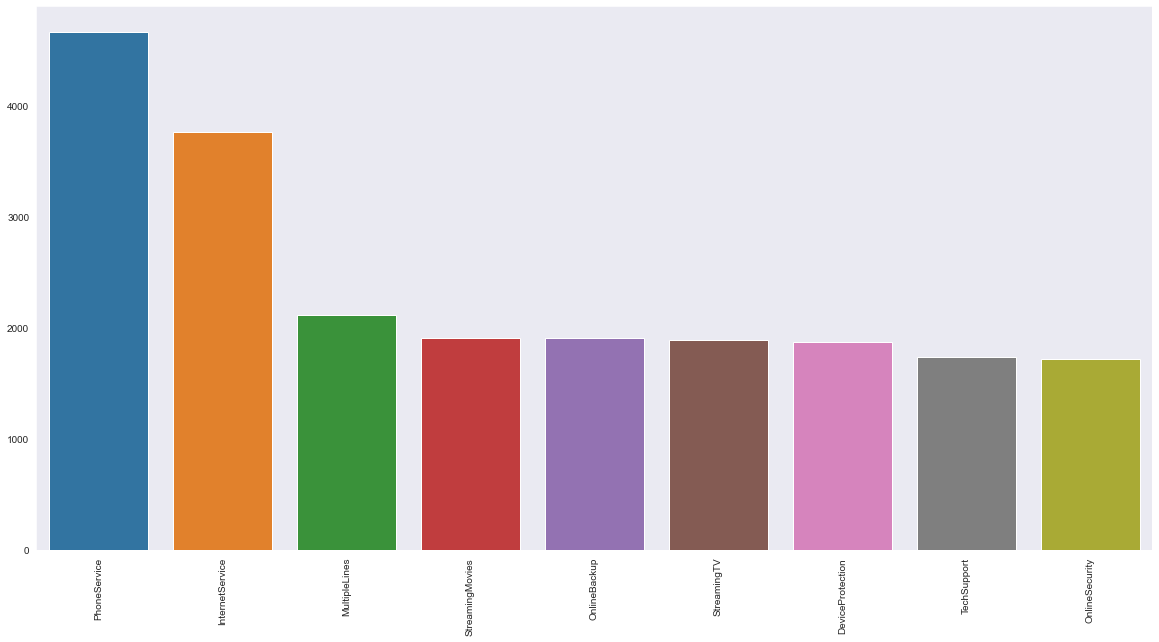

In [29]:
sns.set_style("dark")
#Lets consider the top 20 items purchased freequently
r=df.sum(axis=0).sort_values(ascending=False)[:9]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

### Using Apriori Algorithm

In [37]:
#for market basket analysis (using apriori)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules




In [79]:
#let us return items and ietmsets with atleast 5% support:
freq_items=apriori(df,min_support=0.3,use_colnames=True)
association_results = list(freq_items)

In [80]:
freq_items

,support,itemsets
0,0.901044,(PhoneService)
1,0.409934,(MultipleLines)
2,0.726904,(InternetService)
3,0.333204,(OnlineSecurity)
4,0.368380,(OnlineBackup)
5,0.362775,(DeviceProtection)
6,0.335137,(TechSupport)
7,0.365868,(StreamingTV)
8,0.369927,(StreamingMovies)
9,0.409934,"(PhoneService, MultipleLines)"


In [83]:
print(len(freq_items))

27


In [ ]:
print(freq_items[0])

In [81]:
association_results

['support', 'itemsets']

In [67]:
#Now let's generate association rules

res=association_rules(freq_items,metric="lift",min_threshold=1.3)

In [68]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(InternetService),(OnlineSecurity),0.726904,0.333204,0.333204,0.458389,1.375698,0.090997,1.231133
1,(OnlineSecurity),(InternetService),0.333204,0.726904,0.333204,1.000000,1.375698,0.090997,inf
2,(InternetService),(OnlineBackup),0.726904,0.368380,0.368380,0.506780,1.375698,0.100603,1.280605
3,(OnlineBackup),(InternetService),0.368380,0.726904,0.368380,1.000000,1.375698,0.100603,inf
4,(InternetService),(DeviceProtection),0.726904,0.362775,0.362775,0.499069,1.375698,0.099073,1.272082
5,(DeviceProtection),(InternetService),0.362775,0.726904,0.362775,1.000000,1.375698,0.099073,inf
6,(InternetService),(TechSupport),0.726904,0.335137,0.335137,0.461048,1.375698,0.091525,1.233621
7,(TechSupport),(InternetService),0.335137,0.726904,0.335137,1.000000,1.375698,0.091525,inf
8,(InternetService),(StreamingTV),0.726904,0.365868,0.365868,0.503324,1.375698,0.099917,1.276751
9,(StreamingTV),(InternetService),0.365868,0.726904,0.365868,1.000000,1.375698,0.099917,inf


In [69]:
frequent_itemsets = apriori(df, min_support = 0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.901044,(PhoneService),1
1,0.409934,(MultipleLines),1
2,0.726904,(InternetService),1
3,0.333204,(OnlineSecurity),1
4,0.368380,(OnlineBackup),1
5,0.362775,(DeviceProtection),1
6,0.335137,(TechSupport),1
7,0.365868,(StreamingTV),1
8,0.369927,(StreamingMovies),1
9,0.409934,"(PhoneService, MultipleLines)",2


In [70]:
# getting th item sets with length = 2 and support more han 80%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.3) ]

,support,itemsets,length
9,0.409934,"(PhoneService, MultipleLines)",2
10,0.627947,"(InternetService, PhoneService)",2
11,0.322768,"(PhoneService, OnlineBackup)",2
12,0.313297,"(DeviceProtection, PhoneService)",2
13,0.323154,"(PhoneService, StreamingTV)",2
14,0.326247,"(PhoneService, StreamingMovies)",2
15,0.345767,"(InternetService, MultipleLines)",2
16,0.333204,"(InternetService, OnlineSecurity)",2
17,0.368380,"(InternetService, OnlineBackup)",2
18,0.362775,"(InternetService, DeviceProtection)",2


In [71]:
# getting th item sets with length = 1 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.3) ]

,support,itemsets,length
0,0.901044,(PhoneService),1
1,0.409934,(MultipleLines),1
2,0.726904,(InternetService),1
3,0.333204,(OnlineSecurity),1
4,0.368380,(OnlineBackup),1
5,0.362775,(DeviceProtection),1
6,0.335137,(TechSupport),1
7,0.365868,(StreamingTV),1
8,0.369927,(StreamingMovies),1


In [72]:
# getting th item sets with length = 3 and support more than 30%

frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.3) ]

,support,itemsets,length
22,0.345767,"(InternetService, PhoneService, MultipleLines)",3
23,0.322768,"(InternetService, PhoneService, OnlineBackup)",3
24,0.313297,"(InternetService, DeviceProtection, PhoneService)",3
25,0.323154,"(InternetService, PhoneService, StreamingTV)",3
26,0.326247,"(InternetService, PhoneService, StreamingMovies)",3


In [73]:
# getting th item sets with length = 4 and support more han 80%

frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.3) ]

,support,itemsets,length


### FP Growth Algorithm

In [48]:
#Importing Libraries

from mlxtend.frequent_patterns import fpgrowth

In [52]:
#running the fpgrowth algorithm
res=fpgrowth(df,min_support=0.3,use_colnames=True)

In [53]:
res

,support,itemsets
0,0.726904,(InternetService)
1,0.368380,(OnlineBackup)
2,0.901044,(PhoneService)
3,0.362775,(DeviceProtection)
4,0.333204,(OnlineSecurity)
5,0.335137,(TechSupport)
6,0.409934,(MultipleLines)
7,0.365868,(StreamingTV)
8,0.369927,(StreamingMovies)
9,0.627947,"(InternetService, PhoneService)"


In [54]:
res=association_rules(res,metric="lift",min_threshold=1)

In [55]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(InternetService),(OnlineBackup),0.726904,0.368380,0.368380,0.506780,1.375698,0.100603,1.280605
1,(OnlineBackup),(InternetService),0.368380,0.726904,0.368380,1.000000,1.375698,0.100603,inf
2,"(InternetService, PhoneService)",(OnlineBackup),0.627947,0.368380,0.322768,0.514004,1.395309,0.091444,1.299640
3,"(PhoneService, OnlineBackup)",(InternetService),0.322768,0.726904,0.322768,1.000000,1.375698,0.088147,inf
4,(InternetService),"(PhoneService, OnlineBackup)",0.726904,0.322768,0.322768,0.444031,1.375698,0.088147,1.218111
5,(OnlineBackup),"(InternetService, PhoneService)",0.368380,0.627947,0.322768,0.876180,1.395309,0.091444,3.004797
6,(InternetService),(DeviceProtection),0.726904,0.362775,0.362775,0.499069,1.375698,0.099073,1.272082
7,(DeviceProtection),(InternetService),0.362775,0.726904,0.362775,1.000000,1.375698,0.099073,inf
8,"(InternetService, PhoneService)",(DeviceProtection),0.627947,0.362775,0.313297,0.498923,1.375294,0.085493,1.271709
9,"(DeviceProtection, PhoneService)",(InternetService),0.313297,0.726904,0.313297,1.000000,1.375698,0.085560,inf


In [57]:

fpgrowth(df, min_support=0.3)

,support,itemsets
0,0.726904,(2)
1,0.368380,(4)
2,0.901044,(0)
3,0.362775,(5)
4,0.333204,(3)
5,0.335137,(6)
6,0.409934,(1)
7,0.365868,(7)
8,0.369927,(8)
9,0.627947,"(0, 2)"


In [85]:
x = fpgrowth(df, min_support=0.3, use_colnames=True)
x

,support,itemsets
0,0.726904,(InternetService)
1,0.368380,(OnlineBackup)
2,0.901044,(PhoneService)
3,0.362775,(DeviceProtection)
4,0.333204,(OnlineSecurity)
5,0.335137,(TechSupport)
6,0.409934,(MultipleLines)
7,0.365868,(StreamingTV)
8,0.369927,(StreamingMovies)
9,0.627947,"(InternetService, PhoneService)"


In [76]:
list1 = x['itemsets'].tolist()

In [77]:
list1

[frozenset({'InternetService'}),
 frozenset({'OnlineBackup'}),
 frozenset({'PhoneService'}),
 frozenset({'DeviceProtection'}),
 frozenset({'OnlineSecurity'}),
 frozenset({'TechSupport'}),
 frozenset({'MultipleLines'}),
 frozenset({'StreamingTV'}),
 frozenset({'StreamingMovies'}),
 frozenset({'InternetService', 'PhoneService'}),
 frozenset({'InternetService', 'OnlineBackup'}),
 frozenset({'OnlineBackup', 'PhoneService'}),
 frozenset({'InternetService', 'OnlineBackup', 'PhoneService'}),
 frozenset({'DeviceProtection', 'InternetService'}),
 frozenset({'DeviceProtection', 'PhoneService'}),
 frozenset({'DeviceProtection', 'InternetService', 'PhoneService'}),
 frozenset({'InternetService', 'OnlineSecurity'}),
 frozenset({'InternetService', 'TechSupport'}),
 frozenset({'MultipleLines', 'PhoneService'}),
 frozenset({'InternetService', 'MultipleLines'}),
 frozenset({'InternetService', 'MultipleLines', 'PhoneService'}),
 frozenset({'InternetService', 'StreamingTV'}),
 frozenset({'PhoneService', 

In [78]:
print(f"\ncol_one_list:\n{list1}\ntype:{type(list1)}")


col_one_list:
[frozenset({'InternetService'}), frozenset({'OnlineBackup'}), frozenset({'PhoneService'}), frozenset({'DeviceProtection'}), frozenset({'OnlineSecurity'}), frozenset({'TechSupport'}), frozenset({'MultipleLines'}), frozenset({'StreamingTV'}), frozenset({'StreamingMovies'}), frozenset({'InternetService', 'PhoneService'}), frozenset({'InternetService', 'OnlineBackup'}), frozenset({'PhoneService', 'OnlineBackup'}), frozenset({'InternetService', 'PhoneService', 'OnlineBackup'}), frozenset({'InternetService', 'DeviceProtection'}), frozenset({'DeviceProtection', 'PhoneService'}), frozenset({'InternetService', 'DeviceProtection', 'PhoneService'}), frozenset({'InternetService', 'OnlineSecurity'}), frozenset({'InternetService', 'TechSupport'}), frozenset({'PhoneService', 'MultipleLines'}), frozenset({'InternetService', 'MultipleLines'}), frozenset({'InternetService', 'PhoneService', 'MultipleLines'}), frozenset({'InternetService', 'StreamingTV'}), frozenset({'PhoneService', 'Stream

In [92]:
a = print([list(x) for x in list1])

[['InternetService'], ['OnlineBackup'], ['PhoneService'], ['DeviceProtection'], ['OnlineSecurity'], ['TechSupport'], ['MultipleLines'], ['StreamingTV'], ['StreamingMovies'], ['InternetService', 'PhoneService'], ['InternetService', 'OnlineBackup'], ['PhoneService', 'OnlineBackup'], ['InternetService', 'PhoneService', 'OnlineBackup'], ['InternetService', 'DeviceProtection'], ['DeviceProtection', 'PhoneService'], ['InternetService', 'DeviceProtection', 'PhoneService'], ['InternetService', 'OnlineSecurity'], ['InternetService', 'TechSupport'], ['PhoneService', 'MultipleLines'], ['InternetService', 'MultipleLines'], ['InternetService', 'PhoneService', 'MultipleLines'], ['InternetService', 'StreamingTV'], ['PhoneService', 'StreamingTV'], ['InternetService', 'PhoneService', 'StreamingTV'], ['InternetService', 'StreamingMovies'], ['PhoneService', 'StreamingMovies'], ['InternetService', 'PhoneService', 'StreamingMovies']]


In [94]:
print(a)

None


In [98]:
y=list(list1)

In [99]:
y

[frozenset({'InternetService'}),
 frozenset({'OnlineBackup'}),
 frozenset({'PhoneService'}),
 frozenset({'DeviceProtection'}),
 frozenset({'OnlineSecurity'}),
 frozenset({'TechSupport'}),
 frozenset({'MultipleLines'}),
 frozenset({'StreamingTV'}),
 frozenset({'StreamingMovies'}),
 frozenset({'InternetService', 'PhoneService'}),
 frozenset({'InternetService', 'OnlineBackup'}),
 frozenset({'OnlineBackup', 'PhoneService'}),
 frozenset({'InternetService', 'OnlineBackup', 'PhoneService'}),
 frozenset({'DeviceProtection', 'InternetService'}),
 frozenset({'DeviceProtection', 'PhoneService'}),
 frozenset({'DeviceProtection', 'InternetService', 'PhoneService'}),
 frozenset({'InternetService', 'OnlineSecurity'}),
 frozenset({'InternetService', 'TechSupport'}),
 frozenset({'MultipleLines', 'PhoneService'}),
 frozenset({'InternetService', 'MultipleLines'}),
 frozenset({'InternetService', 'MultipleLines', 'PhoneService'}),
 frozenset({'InternetService', 'StreamingTV'}),
 frozenset({'PhoneService', 

In [102]:
a = [list(x) for x in y]

In [103]:
a

[['InternetService'],
 ['OnlineBackup'],
 ['PhoneService'],
 ['DeviceProtection'],
 ['OnlineSecurity'],
 ['TechSupport'],
 ['MultipleLines'],
 ['StreamingTV'],
 ['StreamingMovies'],
 ['InternetService', 'PhoneService'],
 ['InternetService', 'OnlineBackup'],
 ['PhoneService', 'OnlineBackup'],
 ['InternetService', 'PhoneService', 'OnlineBackup'],
 ['InternetService', 'DeviceProtection'],
 ['DeviceProtection', 'PhoneService'],
 ['InternetService', 'DeviceProtection', 'PhoneService'],
 ['InternetService', 'OnlineSecurity'],
 ['InternetService', 'TechSupport'],
 ['PhoneService', 'MultipleLines'],
 ['InternetService', 'MultipleLines'],
 ['InternetService', 'PhoneService', 'MultipleLines'],
 ['InternetService', 'StreamingTV'],
 ['PhoneService', 'StreamingTV'],
 ['InternetService', 'PhoneService', 'StreamingTV'],
 ['InternetService', 'StreamingMovies'],
 ['PhoneService', 'StreamingMovies'],
 ['InternetService', 'PhoneService', 'StreamingMovies']]

In [129]:
print(a)

[['InternetService'], ['OnlineBackup'], ['PhoneService'], ['DeviceProtection'], ['OnlineSecurity'], ['TechSupport'], ['MultipleLines'], ['StreamingTV'], ['StreamingMovies'], ['InternetService', 'PhoneService'], ['InternetService', 'OnlineBackup'], ['PhoneService', 'OnlineBackup'], ['InternetService', 'PhoneService', 'OnlineBackup'], ['InternetService', 'DeviceProtection'], ['DeviceProtection', 'PhoneService'], ['InternetService', 'DeviceProtection', 'PhoneService'], ['InternetService', 'OnlineSecurity'], ['InternetService', 'TechSupport'], ['PhoneService', 'MultipleLines'], ['InternetService', 'MultipleLines'], ['InternetService', 'PhoneService', 'MultipleLines'], ['InternetService', 'StreamingTV'], ['PhoneService', 'StreamingTV'], ['InternetService', 'PhoneService', 'StreamingTV'], ['InternetService', 'StreamingMovies'], ['PhoneService', 'StreamingMovies'], ['InternetService', 'PhoneService', 'StreamingMovies']]


In [114]:
def ItemRecommender(itemset):
    n= len(itemset)
    
    for i in range(n):
        for j in range(0, n-i-1):
            print(list[i,j])
    

In [115]:
ItemRecommender(['PhoneService', 'StreamingTV'])

TypeError: 'type' object is not subscriptable

In [127]:
def my_function(itemset):
    for x in itemset:
       # print(x)
        
        if(x in a):
            print('Element Exists')
      
  
itemset = ['PhoneService', 'StreamingTV']

In [128]:
my_function(itemset)